In [582]:
import numpy as np
import pandas as pd

In [583]:
mashroom = pd.read_csv('mushroom edibility classification dataset.csv')
mashroom.head()

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,poisonous,5.0,2,4.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
1,1,edible,5.0,2,9.0,bruises is there,0,0,2,2,2,7,7,0,2,1,4,3,2,1
2,2,edible,0.0,2,8.0,bruises is there,3,0,2,2,2,7,7,0,2,1,4,3,2,3
3,3,poisonous,5.0,3,8.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
4,4,edible,5.0,2,3.0,no bruises,5,1,3,2,2,7,7,0,2,1,0,3,0,1


In [584]:
mashroom.shape

(3124, 20)

In [585]:
mashroom.isnull().sum()

Unnamed: 0                  0
class                       0
cap-shape                   8
cap-surface                 0
cap-color                   8
bruises                     0
odor                        0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [586]:
mashroom_corr = mashroom.corr()


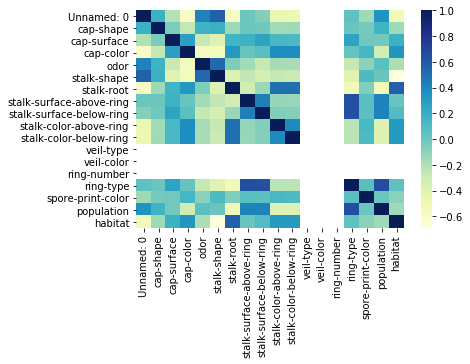

In [587]:
import seaborn as sns

sns.heatmap(mashroom_corr, cmap= 'YlGnBu')

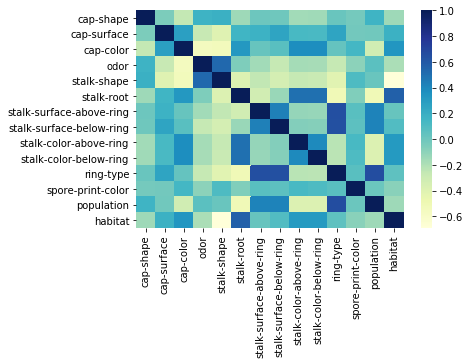

In [588]:
#removing redundant columns that has no distinguishing features
mashroom.drop('veil-type',axis=1,inplace=True) #all the values are 0
mashroom.drop('veil-color',axis=1,inplace=True) #all the values are 2
mashroom.drop('ring-number',axis=1,inplace=True) #all the values are 1
mashroom.drop('Unnamed: 0',axis=1,inplace=True)
mashroom_corr = mashroom.corr()
sns.heatmap(mashroom_corr, cmap= 'YlGnBu')

In [589]:
# handling NaN values
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')

impute.fit(mashroom[['cap-shape']])
mashroom['cap-shape'] = impute.transform(mashroom[['cap-shape']])

impute.fit(mashroom[['cap-color']])
mashroom['cap-color'] = impute.transform(mashroom[['cap-color']])
# mashroom.iloc[302]
mashroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [590]:
#encode
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

mashroom['class'] = enc.fit_transform(mashroom['class'])
mashroom['bruises'] = enc.fit_transform(mashroom['bruises'])
mashroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   class                     3124 non-null   int32  
 1   cap-shape                 3124 non-null   float64
 2   cap-surface               3124 non-null   int64  
 3   cap-color                 3124 non-null   float64
 4   bruises                   3124 non-null   int32  
 5   odor                      3124 non-null   int64  
 6   stalk-shape               3124 non-null   int64  
 7   stalk-root                3124 non-null   int64  
 8   stalk-surface-above-ring  3124 non-null   int64  
 9   stalk-surface-below-ring  3124 non-null   int64  
 10  stalk-color-above-ring    3124 non-null   int64  
 11  stalk-color-below-ring    3124 non-null   int64  
 12  ring-type                 3124 non-null   int64  
 13  spore-print-color         3124 non-null   int64  
 14  populati

In [591]:
from sklearn.model_selection import train_test_split
mashroom_target = mashroom['class']
mashroom_data = mashroom.drop('class',axis=1)

X_train, X_test, y_train, y_test = train_test_split(mashroom_data, mashroom_target, test_size = 0.25, stratify = mashroom_target, random_state = 0)

In [592]:
#scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [593]:
print("per-feature minimum after scaling:\n {}".format(
    X_train.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [594]:
print('label :')  # The class is the label
label = pd.DataFrame(mashroom['class'])
label


label :


,class
0,1
1,0
2,0
3,1
4,0
...,...
3119,1
3120,0
3121,0
3122,1


In [595]:
print('features :')
mashroom_data

features :


,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,5.0,2,4.00000,0,6,0,3,2,2,7,7,4,2,3,5
1,5.0,2,9.00000,0,0,0,2,2,2,7,7,4,3,2,1
2,0.0,2,8.00000,0,3,0,2,2,2,7,7,4,3,2,3
3,5.0,3,8.00000,0,6,0,3,2,2,7,7,4,2,3,5
4,5.0,2,3.00000,1,5,1,3,2,2,7,7,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,5.0,0,5.10077,1,1,0,1,2,2,7,7,4,3,4,0
3120,2.0,0,3.00000,0,5,1,1,2,2,6,3,4,2,5,0
3121,2.0,3,3.00000,0,5,1,1,2,2,3,7,4,3,5,0
3122,5.0,0,3.00000,1,2,0,1,1,1,4,0,2,1,5,0
